In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import io
import utils.utils as utils

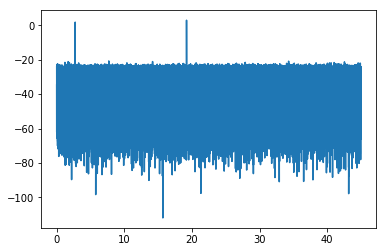

In [3]:
#Generate noise plus two sinewaves at 19.2MHz and 19.2/7MHz
fs = 90e6
f = 19.2e6
tmax = 100e-3;
Ncycles = int(tmax*f)
t = np.arange(0,int(Ncycles*(fs/f)))*(1/fs)
noise = np.random.normal(scale=np.sqrt(0.0001*fs/2),size=t.shape)
x = 2*np.sqrt(2)*np.sin(2*np.pi*f*t)+2*np.sqrt(2)*np.sin(2*np.pi*(f/7)*t)+noise
w,ff=utils.osfft(x,fs)
plt.plot(w,20*np.log10(ff))

Text(0.5,0,'f(MHz)')

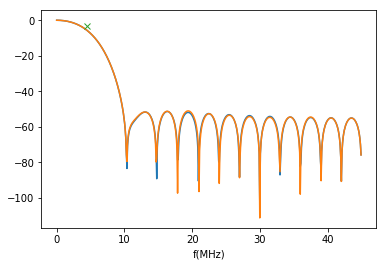

In [5]:
# Fir filter design. 
fc = 4.5e6
b = signal.firwin(30,fc/(fs/2))
# Scale filter coeffs and round them, plot both filters frequency response.
scaling=2**14
bg = np.fix(b*scaling)
#import sys
#for x in np.nditer(bg):
#    sys.stdout.write("%d ,"%x)
w,h=signal.freqz(b)
w,hg=signal.freqz(bg)
plt.plot((w*fs/(2*np.pi))/1e6,20*np.log10(np.abs(h)))
plt.plot((w*fs/(2*np.pi))/1e6,20*np.log10(np.abs(hg)/scaling))
plt.plot(fc/1e6,-3,'x') #Cutoff
plt.xlabel("f(MHz)")

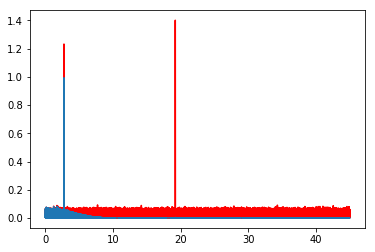

In [6]:
# Apply the ideal filter.
w,ffx = utils.osfft(x,fs)
plt.plot(w,ffx,'r')
xf = signal.lfilter(b,1,x)
w,ffxf = utils.osfft(xf,fs)
plt.plot(w,ffxf)


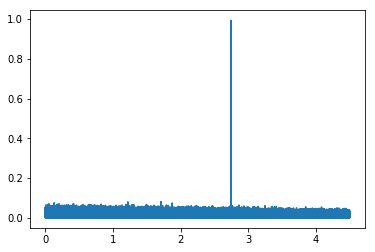

In [8]:
# Decimate after filtering
frs = 2*fc
xfds=np.interp((fs/frs)*np.arange(int(len(xf)/(fs/frs))),np.arange(len(xf)),xf)
w,xffrs = utils.osfft(xfds,frs)
plt.plot(w,xffrs)

In [ ]:
# Quantify test signal, no scaling is applied only truncation.
xfix=np.trunc(x)
xfix=xfix.astype('int8')
print(xfix[0:10])
with open("../test/data","wb") as f:
    f.write(bytes(xfix))

In [ ]:
w,ffxq=utils.osfft(xfix,fs)
plt.plot(w,ffxq)
#plt.plot(w,ffxq)


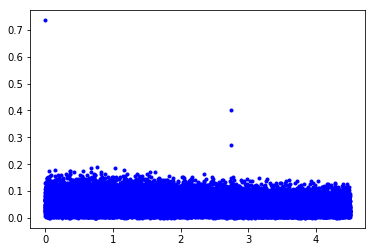

In [10]:
# Retrieve filtered data in C and VHDL and check the results (PENDING).
frs = fs/10
xorig = np.fromfile("test_data","int8",900000000);
xtrunc = np.fromfile("out_truncate","int8",90000)
#xqr = np.fromfile("fir_out_round","int8",90000000)
#xq=np.trunc(xq/2**24)
w,ffxq=utils.osfft(xtrunc,frs)
#w,ffxqr=utils.osfft(xqr,frs)
plt.plot(w,ffxq,'b.')
#plt.plot(w,ffxqr,'rx')


In [12]:
print(xorig[0:40])
print(xtrunc[0:40])

[  77  -75  -56  -15  -64  106   86   55   20  -38   18  103   19   33
   52   25 -108  -43   -7   65   15  -54  -59   69  -40  -48  -93  -62
  -87   52  -37  -44  -10    9  -41   99   82   -6   43  -20]
[  0   0   0  10 -31   6 -15 -47 -10   9 -19 -12  -1   6  12  11   1 -27
  -8   2  -7   3 -25  16 -30  14   3  -8   8 -13  -9  13 -20  -6  28  49
  23   1 -20 -18]


In [ ]:
plt.subplot(2,1,1)
plt.hist(xqr,256);
plt.subplot(2,1,2)
plt.hist(xq,256);